In [ ]:
#objective : improve customer experience by analyzing sales data
#          :  increase revenue

diwali sales analysis

1. loading data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df= pd.read_csv('Data.csv',encoding= 'unicode_escape')

In [14]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [15]:
df.shape

(11251, 15)

In [16]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


2.Data cleaning

In [18]:
df.drop(['Status','unnamed1'],axis=1 , inplace=True)

In [20]:
#checking null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [21]:
#droping null values
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [24]:
df['Amount'] =df['Amount'].astype('int')

In [25]:
df['Amount'].dtypes

dtype('int32')

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [27]:
#rename column
df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [28]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [29]:
#for specific column
df[['Age','Orders','Amount']]

,Age,Orders,Amount
0,28,1,23952
1,35,3,23934
2,35,3,23924
3,16,2,23912
4,28,2,23877
...,...,...,...
11246,19,4,370
11247,33,3,367
11248,40,4,213
11249,37,3,206


EXPLORATORY DATA ANALYSIS


In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

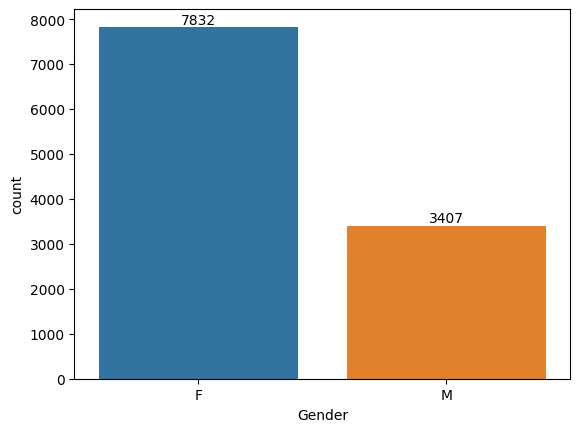

In [32]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

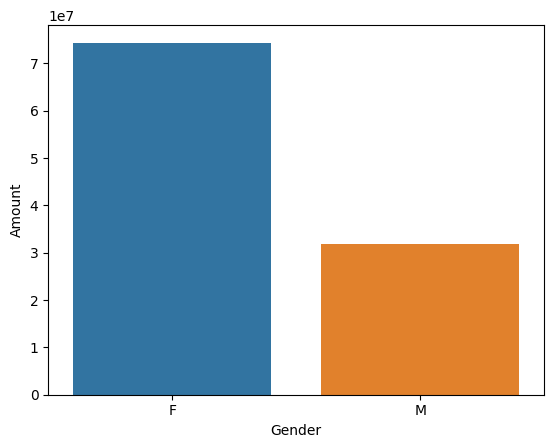

In [36]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax1=sns.barplot(x='Gender',y='Amount' , data=sales_gen)


from above graph we can see that most of the buyers are females and even the purchasing power of females are greater than men

analysis on the base of AGE


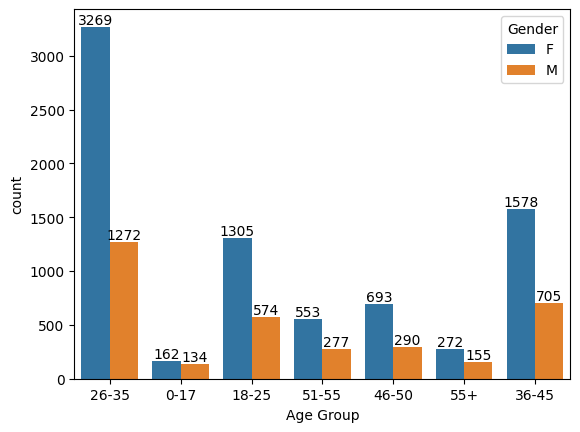

In [40]:
ax=sns.countplot(x='Age Group',data=df , hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

from the above graph we can see that most of the buyers are of the age group 26-35 yrs and mostly are females

State

In [45]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

In [42]:
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<AxesSubplot:xlabel='State', ylabel='Orders'>

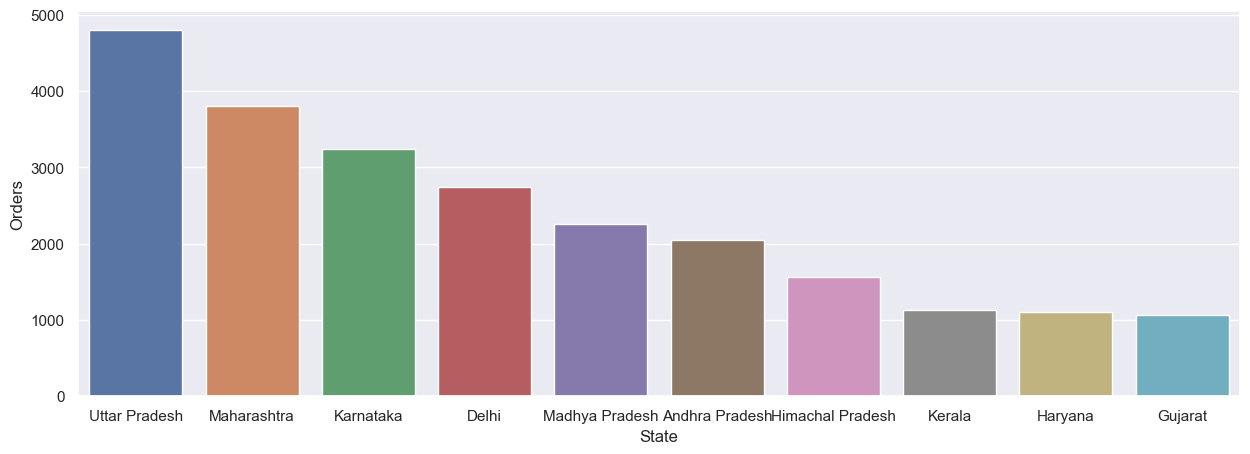

In [52]:
#total number of orders from top 10 states
sns.set_theme(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state , x= 'State',y='Orders')

In [55]:
#total amount/sales from top 10 countires
sale_count= df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sale_count

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


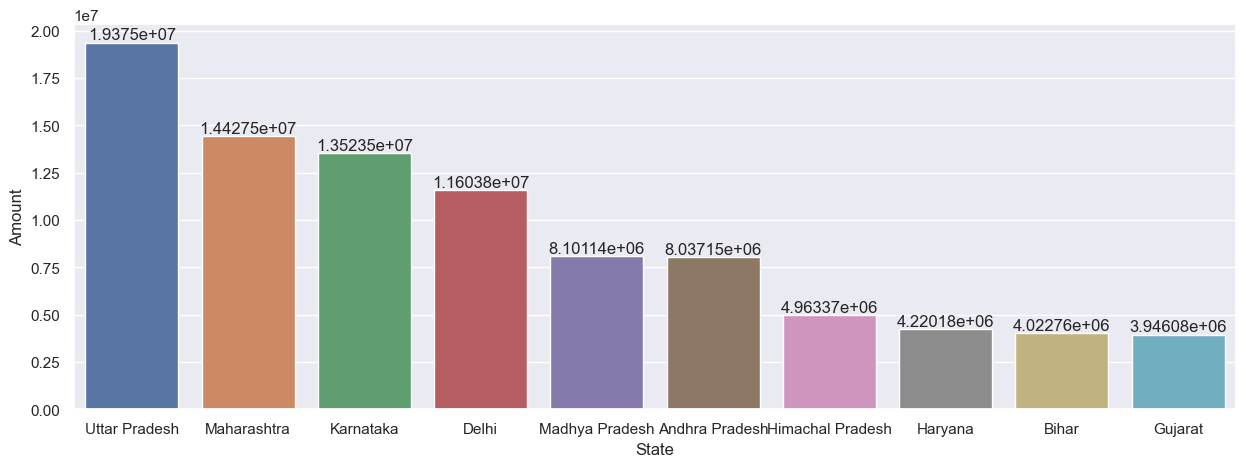

In [57]:
sns.set_theme(rc={'figure.figsize':(15,5)})
ax=sns.barplot(data=sale_count,x='State' , y = 'Amount')

for bars in ax.containers:
    ax.bar_label(bars)

we can see that most of the orders are from uttar pradesh , maharashtra , and karnataka 
most of the amount spend are also from same countire 
in case of haryana orders are less but amount spend is high 

Marital status

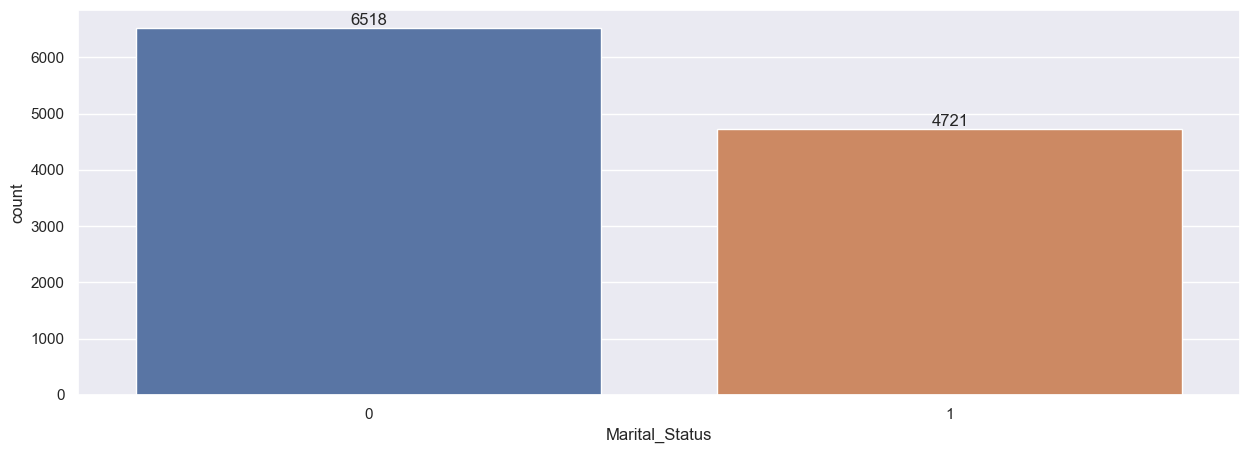

In [58]:
ax = sns.countplot(data= df , x='Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

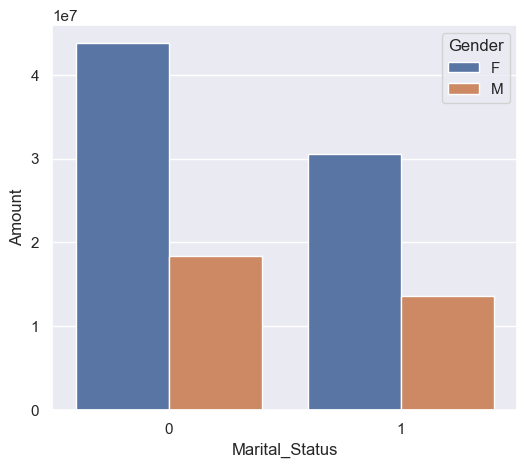

In [65]:
sales_state= df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(6,5)})
sns.barplot(data= sales_state , x='Marital_Status',y='Amount' , hue ='Gender')

from above graphs we can see that most of the buyers are married (women) and they have high purchasing power

Occupation

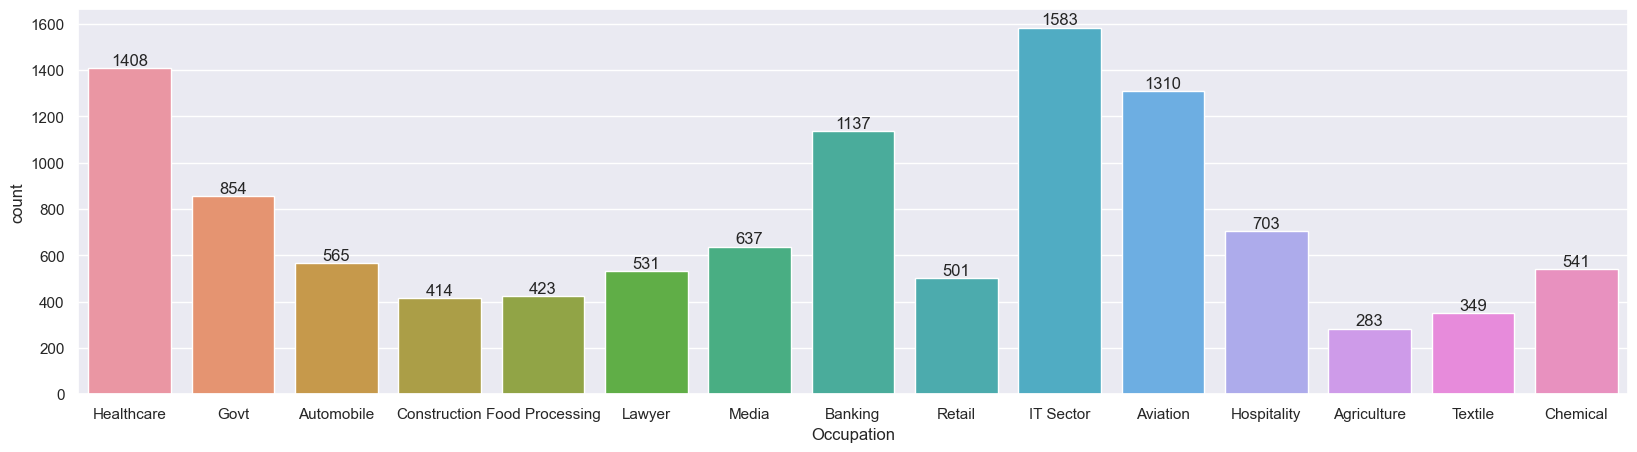

In [67]:
sns.set_theme(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data = df , x= 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

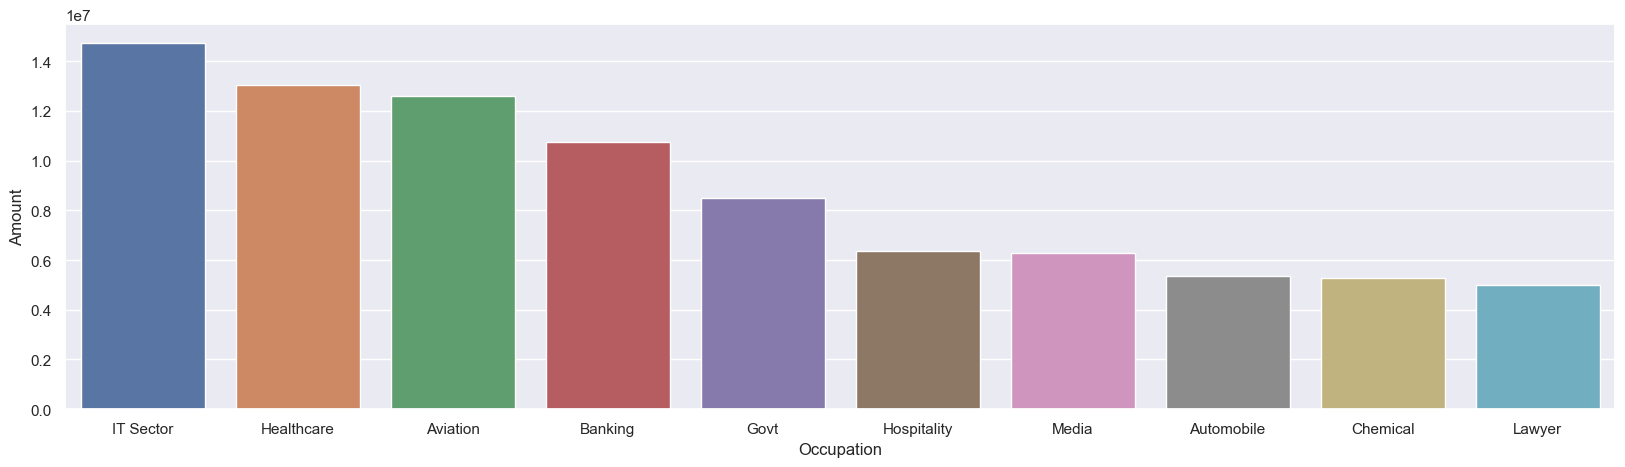

In [68]:
sales_state= df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_state , x='Occupation',y='Amount')

from above graphs we can see that most of the buyers are working in IT , Aviation and Helathcare sector

PRODUCT CATEGORY

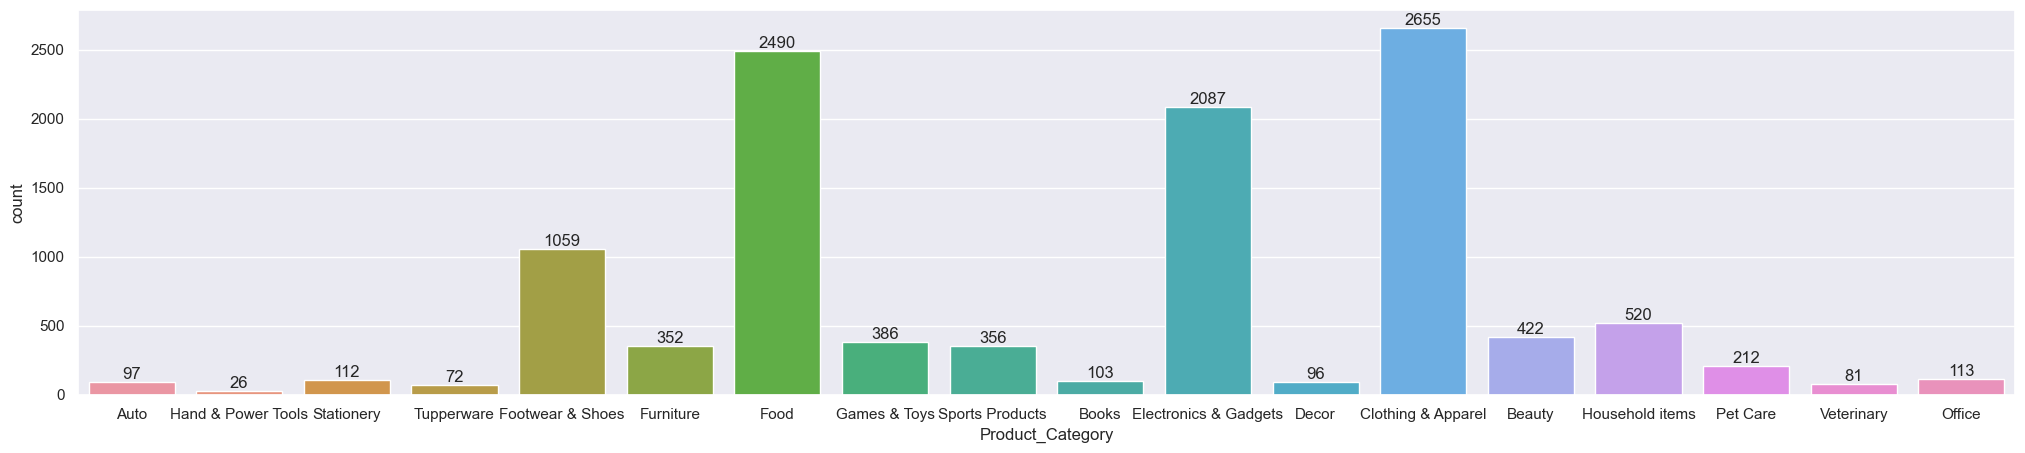

In [70]:
sns.set_theme(rc={'figure.figsize':(25,5)})
ax= sns.countplot(data= df, x='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

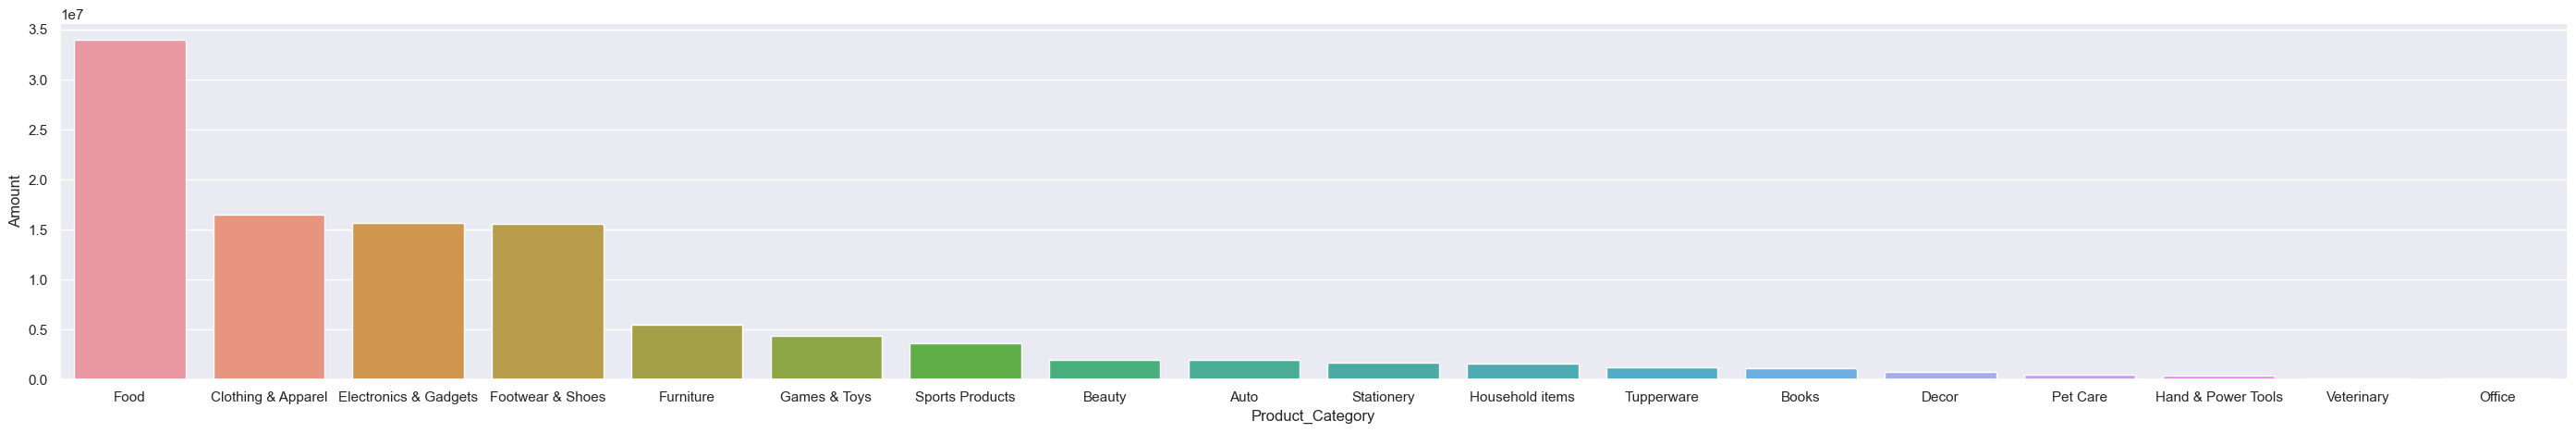

In [73]:
sales_state= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set_theme(rc={'figure.figsize':(35,5)})
sns.barplot(data= sales_state, x='Product_Category' , y = 'Amount')

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

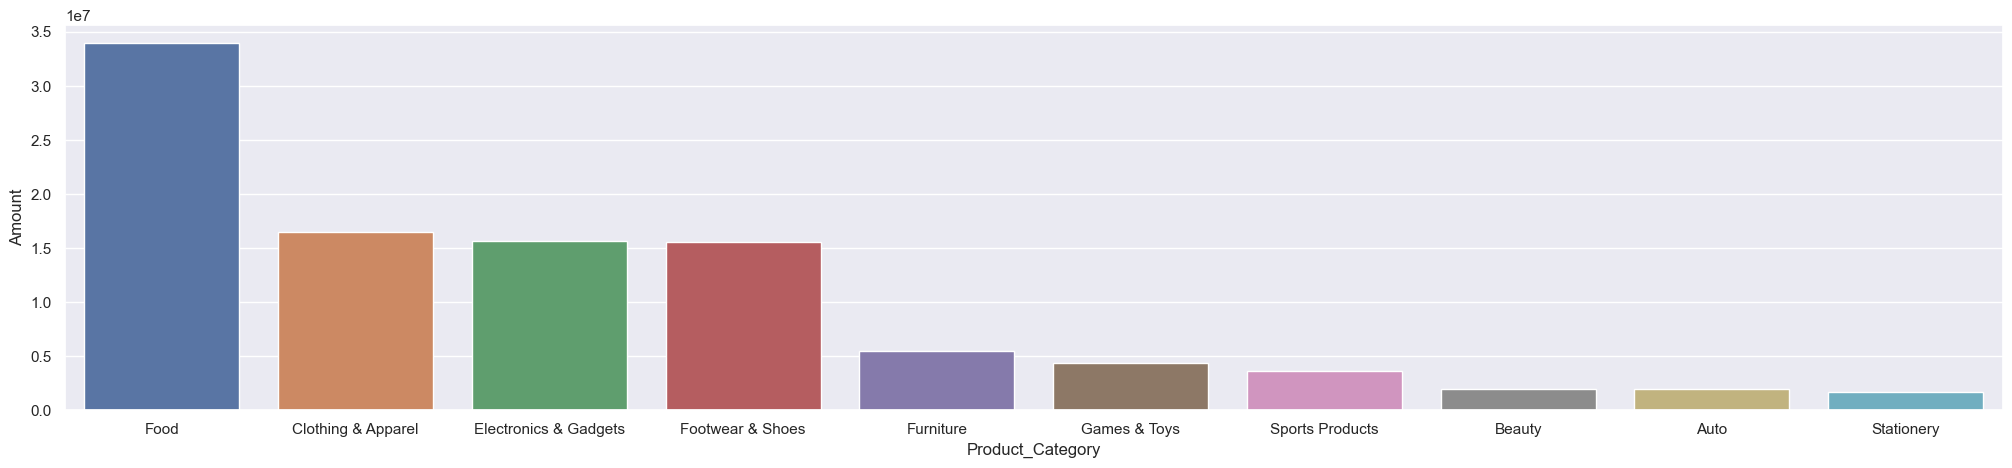

In [75]:
#top 10 most sold product 
sales_state= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(25,5)})
sns.barplot(data= sales_state, x='Product_Category' , y = 'Amount')

conclusion: 

Married women age group of 26-25 yrs from up, maharastra and karnataka working in IT , Heakthcare and Aviation are more likely buy products from food , clothing and Electronics Category